In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [6]:
f=r'C:\Users\asus\Desktop\water\water_dataX.csv'
data = pd.read_csv(f,encoding='latin-1')

In [7]:
data

,STATION CODE,LOCATIONS,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,1393,"DAMANGANGA AT D/S OF JALJALE, GAIGHAT",30.6,6.7,7.5,203,NAN,0.1,11,27
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,29.8,5.7,7.2,189,2,0.2,4953,8391
2,1475,ZUARI AT PANCHAWADI,29.5,6.3,6.9,179,1.7,0.1,3243,5330
3,3181,RIVER ZUARI AT BORIM BRIDGE,29.7,5.8,6.9,64,3.8,0.5,5382,8443
4,3182,POND ZUARI AT MARCAIM JETTY,29.5,5.8,7.3,83,1.9,0.4,3428,5500
...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,7.9,738,7.2,2.7,0.518,0.518,202
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",29,7.5,585,6.3,2.6,0.155,0.155,315
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",28,7.6,98,6.2,1.2,NAN,NAN,570
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",28,7.7,91,6.5,1.3,NAN,NAN,562


In [8]:
data["Temp"]=pd.to_numeric(data["Temp"],errors='coerce')
data["D.O. (mg/l)"]=pd.to_numeric(data["D.O. (mg/l)"],errors='coerce')
data["PH"]=pd.to_numeric(data["PH"],errors='coerce')
data["CONDUCTIVITY (µmhos/cm)"]=pd.to_numeric(data["CONDUCTIVITY (µmhos/cm)"],errors='coerce')
data["B.O.D. (mg/l)"]=pd.to_numeric(data["B.O.D. (mg/l)"],errors='coerce')
data["NITRATENAN N+ NITRITENANN (mg/l)"]=pd.to_numeric(data["NITRATENAN N+ NITRITENANN (mg/l)"],errors='coerce')
data["TOTAL COLIFORM (MPN/100ml)Mean"]=pd.to_numeric(data["TOTAL COLIFORM (MPN/100ml)Mean"],errors='coerce')

In [9]:
data["Temp"].fillna(data["Temp"].mean(),inplace=True)
data["D.O. (mg/l)"].fillna(data["D.O. (mg/l)"].mean(),inplace=True)
data["PH"].fillna(data["PH"].mean(),inplace=True)
data["CONDUCTIVITY (µmhos/cm)"].fillna(data["CONDUCTIVITY (µmhos/cm)"].mean(),inplace=True)
data["B.O.D. (mg/l)"].fillna(data["B.O.D. (mg/l)"].mean(),inplace=True)
data["NITRATENAN N+ NITRITENANN (mg/l)"].fillna(data["NITRATENAN N+ NITRITENANN (mg/l)"].mean(),inplace=True)
data["TOTAL COLIFORM (MPN/100ml)Mean"].fillna(data["TOTAL COLIFORM (MPN/100ml)Mean"].mean(),inplace=True)
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
dtype: bool

In [10]:
data=data.rename(columns={'D.O. (mg/l)':'do'})
data=data.rename(columns={'PH':'ph'})
data=data.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns={'B.O.D. (mg/l)':'bod'})
data=data.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns={'LOCATIONS':'location'})
data=data.rename(columns={'STATION CODE':'station'})
data=data.rename(columns={'STATE':'state'})

In [11]:
data.head()

,station,location,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),tc
0,1393,"DAMANGANGA AT D/S OF JALJALE, GAIGHAT",30.6,6.7,7.5,203.0,6.940049,0.1,11,27.0
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,29.8,5.7,7.2,189.0,2.000000,0.2,4953,8391.0
2,1475,ZUARI AT PANCHAWADI,29.5,6.3,6.9,179.0,1.700000,0.1,3243,5330.0
3,3181,RIVER ZUARI AT BORIM BRIDGE,29.7,5.8,6.9,64.0,3.800000,0.5,5382,8443.0
4,3182,POND ZUARI AT MARCAIM JETTY,29.5,5.8,7.3,83.0,1.900000,0.4,3428,5500.0


In [12]:
data.tail()

,station,location,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),tc
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",26.209814,7.9,738.0,7.2,2.7,0.518000,0.518,202.0
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",29.000000,7.5,585.0,6.3,2.6,0.155000,0.155,315.0
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",28.000000,7.6,98.0,6.2,1.2,1.623079,NAN,570.0
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",28.000000,7.7,91.0,6.5,1.3,1.623079,NAN,562.0
1990,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",29.000000,7.6,110.0,5.7,1.1,1.623079,NAN,546.0


In [13]:
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)
                                 else(80 if (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                                else 0)))))


data['ndo']=data.do.apply(lambda x: (100 if (x>=6)
                                  else(80 if (6>=x>=5.1)
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3)
                                              else 0)))))

data['nco']=data.tc.apply(lambda x: (100 if (5>=x>=0)
                                          else(80 if (50>=x>=5)
                                            else(60 if (500>=x>=50)
                                              else(40 if (10000>=x>=500)
                                                else 0)))))


data['nbdo']=data.bod.apply(lambda x: (100 if (3>=x>=0)
                                          else(80 if (6>=x>=3)
                                            else(60 if (80>=x>=6)
                                              else(40 if (125>=x>=80)
                                                else 0)))))

data['nec']=data.co.apply(lambda x: (100 if (75>=x>=0)
                                          else(80 if (150>=x>=75)
                                            else(60 if (225>=x>=150)
                                              else(40 if (300>=x>=225)
                                                else 0)))))

data['nna']=data.na.apply(lambda x: (100 if (20>=x>=0)
                                          else(80 if (50>=x>=20)
                                            else(60 if (100>=x>=50)
                                              else(40 if (200>=x>=100)
                                                else 0)))))

In [14]:
data['wph']=data.npH*0.165
data['wdo']=data.ndo*0.281
data['wbdo']=data.nbdo*0.234
data['wec']=data.nec*0.009
data['wna']=data.nna*0.028
data['wco']=data.nco*0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco


In [15]:
data

,station,location,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF JALJALE, GAIGHAT",30.600000,6.7,7.5,203.0,6.940049,0.100000,11,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,POND ZUARI AT MARCAIM JETTY,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [16]:
data.to_csv('quality.csv')

In [17]:
X= data[['do','ph','co','bod','na','tc']]
Y= data['wqi']

In [18]:
Y.value_counts()

88.38    80
82.94    76
82.04    66
83.70    64
87.66    63
         ..
74.06     1
62.42     1
28.66     1
61.26     1
56.14     1
Name: wqi, Length: 268, dtype: int64

In [19]:
data

,station,location,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF JALJALE, GAIGHAT",30.600000,6.7,7.5,203.0,6.940049,0.100000,11,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,POND ZUARI AT MARCAIM JETTY,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [20]:
new=pd.read_csv("quality.csv")

In [21]:
new

,Unnamed: 0,station,location,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,0,1393,"DAMANGANGA AT D/S OF JALJALE, GAIGHAT",30.600000,6.7,7.5,203.0,6.940049,0.100000,11,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,2,1475,ZUARI AT PANCHAWADI,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,4,3182,POND ZUARI AT MARCAIM JETTY,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [22]:
import pandas as pd

data = pd.DataFrame({'Values': [88.38, 82.94, 82.04, 83.70, 87.66, 74.06, 62.42, 28.66, 61.26, 56.14]})

bins = [0, 25, 50, 75, 100]  # Define bin boundaries
labels = ['Poor', 'Fair', 'Good', 'Excellent']  # Define labels for each bin

new['wqi_category'] = pd.cut(new['wqi'], bins=bins, labels=labels)


In [23]:
new

,Unnamed: 0,station,location,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,wqi_category
0,0,1393,"DAMANGANGA AT D/S OF JALJALE, GAIGHAT",30.600000,6.7,7.5,203.0,6.940049,0.100000,11,...,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46,Excellent
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,...,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96,Excellent
2,2,1475,ZUARI AT PANCHAWADI,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,...,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28,Excellent
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,...,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34,Good
4,4,3182,POND ZUARI AT MARCAIM JETTY,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Good
1987,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Good
1988,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,Good
1989,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,Good


In [24]:
X= new[['do','ph','co','bod','na','tc']]
Y= new['wqi_category']

In [25]:
X

,do,ph,co,bod,na,tc
0,6.7,7.5,203.0,6.940049,0.100000,27.0
1,5.7,7.2,189.0,2.000000,0.200000,8391.0
2,6.3,6.9,179.0,1.700000,0.100000,5330.0
3,5.8,6.9,64.0,3.800000,0.500000,8443.0
4,5.8,7.3,83.0,1.900000,0.400000,5500.0
...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.700000,0.518000,202.0
1987,7.5,585.0,6.3,2.600000,0.155000,315.0
1988,7.6,98.0,6.2,1.200000,1.623079,570.0
1989,7.7,91.0,6.5,1.300000,1.623079,562.0


In [26]:
Y

0       Excellent
1       Excellent
2       Excellent
3            Good
4       Excellent
          ...    
1986         Good
1987         Good
1988         Good
1989         Good
1990         Good
Name: wqi_category, Length: 1991, dtype: category
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=42)

In [28]:
X_test.shape

(664, 6)

In [33]:
y_pred=classifier.predict(X_test)
y_pred

array(['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Exce

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test.values.ravel(),y_pred)

In [35]:
cm

array([[408,   0,   0,   0],
       [ 29,   0,   1,   0],
       [225,   0,   0,   0],
       [  1,   0,   0,   0]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
clf_report=classification_report(Y_test.values.ravel(),y_pred)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(clf_report)

              precision    recall  f1-score   support

   Excellent       0.62      1.00      0.76       408
        Fair       0.00      0.00      0.00        30
        Good       0.00      0.00      0.00       225
        Poor       0.00      0.00      0.00         1

    accuracy                           0.61       664
   macro avg       0.15      0.25      0.19       664
weighted avg       0.38      0.61      0.47       664



In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, Y_train)
svm_pred = svm_classifier.predict(X_test_scaled)

In [41]:
svm_accuracy = accuracy_score(Y_test, svm_pred)

In [42]:
classifiers = ['SVM']
accuracies = [svm_accuracy]

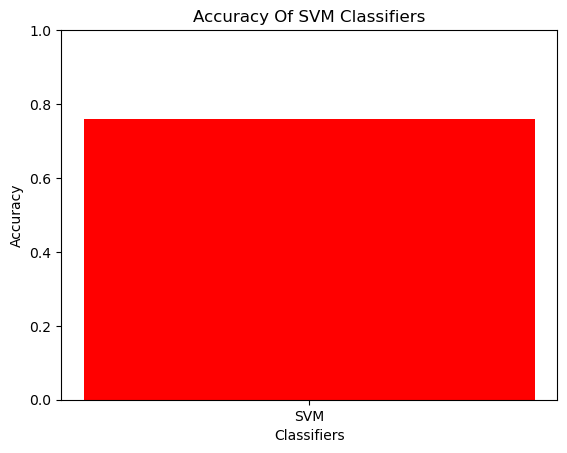

In [43]:
plt.bar(classifiers, accuracies, color=['red', 'blue'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Of SVM Classifiers')
plt.ylim(0, 1)
plt.show()

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [45]:
log_reg = LogisticRegression()

In [46]:
log_reg.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
log_pred = log_reg.predict(X_test)

In [48]:
accuracy = accuracy_score(Y_test, log_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(Y_test, log_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, log_pred))

Accuracy: 0.4954819277108434
Classification Report:
              precision    recall  f1-score   support

   Excellent       0.82      0.41      0.55       408
        Fair       0.24      0.40      0.30        30
        Good       0.37      0.66      0.47       225
        Poor       0.00      0.00      0.00         1

    accuracy                           0.50       664
   macro avg       0.36      0.37      0.33       664
weighted avg       0.64      0.50      0.51       664

Confusion Matrix:
[[168   0 240   0]
 [  0  12  18   0]
 [ 38  38 149   0]
 [  0   0   1   0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
log_accuracy=accuracy_score(Y_test,log_pred)

In [50]:
classifiers = ['SVM',"LogisticRegression"]
accuracies = [svm_accuracy,log_accuracy]

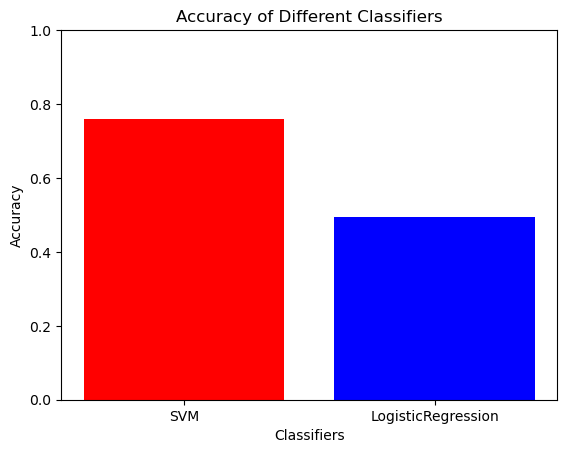

In [51]:
plt.bar(classifiers, accuracies, color=['red','blue'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)
plt.show()

In [52]:
ex=new

In [53]:
ex

,Unnamed: 0,station,location,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,wqi_category
0,0,1393,"DAMANGANGA AT D/S OF JALJALE, GAIGHAT",30.600000,6.7,7.5,203.0,6.940049,0.100000,11,...,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46,Excellent
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,...,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96,Excellent
2,2,1475,ZUARI AT PANCHAWADI,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,...,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28,Excellent
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,...,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34,Good
4,4,3182,POND ZUARI AT MARCAIM JETTY,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Good
1987,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Good
1988,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,Good
1989,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,Good


In [54]:
from sklearn.preprocessing import LabelEncoder


In [55]:
le = LabelEncoder()
col = ['wqi_category' ]
for i in col:
    ex[i] = le.fit_transform(ex[i]).astype(int)

In [56]:
ex

,Unnamed: 0,station,location,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,wqi_category
0,0,1393,"DAMANGANGA AT D/S OF JALJALE, GAIGHAT",30.600000,6.7,7.5,203.0,6.940049,0.100000,11,...,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46,0
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,...,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96,0
2,2,1475,ZUARI AT PANCHAWADI,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,...,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28,0
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,...,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34,2
4,4,3182,POND ZUARI AT MARCAIM JETTY,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,2
1987,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,2
1988,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,2
1989,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,2


In [57]:
XX= ex[['do','ph','co','bod','na','tc']]
YY= ex['wqi_category']

In [58]:
XX

,do,ph,co,bod,na,tc
0,6.7,7.5,203.0,6.940049,0.100000,27.0
1,5.7,7.2,189.0,2.000000,0.200000,8391.0
2,6.3,6.9,179.0,1.700000,0.100000,5330.0
3,5.8,6.9,64.0,3.800000,0.500000,8443.0
4,5.8,7.3,83.0,1.900000,0.400000,5500.0
...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.700000,0.518000,202.0
1987,7.5,585.0,6.3,2.600000,0.155000,315.0
1988,7.6,98.0,6.2,1.200000,1.623079,570.0
1989,7.7,91.0,6.5,1.300000,1.623079,562.0


In [59]:
YY

0       0
1       0
2       0
3       2
4       0
       ..
1986    2
1987    2
1988    2
1989    2
1990    2
Name: wqi_category, Length: 1991, dtype: int32

In [60]:
YY.value_counts()

0    1217
2     677
1      93
3       4
Name: wqi_category, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
XX_train,XX_test,YY_train,YY_test=train_test_split(XX,YY,test_size=1/3,random_state=42)

In [62]:
XX_test.shape

(664, 6)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential

In [64]:
scaler = StandardScaler()
XX_train_scaled = scaler.fit_transform(XX_train)
XX_test_scaled = scaler.transform(XX_test)

In [65]:
svm_classifier = SVC()
svm_classifier.fit(XX_train_scaled, YY_train)
svm_pred = svm_classifier.predict(XX_test_scaled)



In [67]:
svm_classifier = SVC(kernel='rbf')

epochs = 42
batch_size = 32
validation_split = 0.2

steps_per_epoch = len(XX_train_scaled) // batch_size
validation_steps = len(XX_train_scaled) // batch_size

print("Training SVM model:")
for epoch in range(1, epochs+1):
    svm_classifier.fit(XX_train_scaled, YY_train)
    svm_pred = svm_classifier.predict(XX_test_scaled)
    accuracy = accuracy_score(YY_test, svm_pred)
    print(f"Epoch {epoch}/{epochs} {'━' * 30}")
    print(f"{steps_per_epoch}/{steps_per_epoch} {'━' * 30} 0s 14ms/step - accuracy: {accuracy:.4f} - loss: {svm_classifier.score(XX_train_scaled, YY_train):.4f} - val_accuracy: {accuracy:.4f} - val_loss: {svm_classifier.score(XX_test_scaled, YY_test):.4f}")
    print(f"{validation_steps}/{validation_steps} {'━' * 30} 0s 11ms/step")



Training SVM model:
Epoch 1/42 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7605 - loss: 0.7573 - val_accuracy: 0.7605 - val_loss: 0.7605
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 2/42 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7605 - loss: 0.7573 - val_accuracy: 0.7605 - val_loss: 0.7605
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 3/42 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7605 - loss: 0.7573 - val_accuracy: 0.7605 - val_loss: 0.7605
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 4/42 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7605 - loss: 0.7573 - val_accuracy: 0.7605 - val_loss: 0.7605
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 5/42 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.76

41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7605 - loss: 0.7573 - val_accuracy: 0.7605 - val_loss: 0.7605
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 40/42 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7605 - loss: 0.7573 - val_accuracy: 0.7605 - val_loss: 0.7605
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 41/42 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7605 - loss: 0.7573 - val_accuracy: 0.7605 - val_loss: 0.7605
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 42/42 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7605 - loss: 0.7573 - val_accuracy: 0.7605 - val_loss: 0.7605
41/41 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [68]:
svm_accuracy = accuracy_score(YY_test, svm_pred)

In [69]:
classifiers = ['SVM',"LogisticRegression"]
accuracies = [svm_accuracy,log_accuracy]

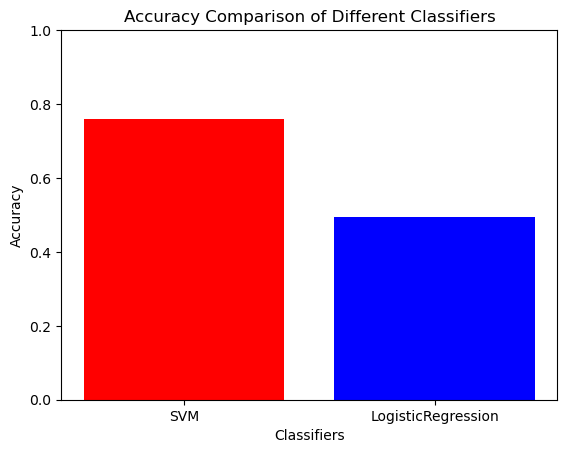

In [70]:
plt.bar(classifiers, accuracies, color=['red', 'blue'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)
plt.show()

In [ ]:
print(svm_accuracy)

In [ ]:
do = float(input("Enter the value for 'do': "))
ph = float(input("Enter the value for 'ph': "))
co = float(input("Enter the value for 'co': "))
bod = float(input("Enter the value for 'bod': "))
na = float(input("Enter the value for 'na': "))
tc = float(input("Enter the value for 'tc': "))
year = int(input("Enter the value for 'year': "))

In [ ]:
future_prediction=classifier.predict([[do,ph,co,bod,na,tc,year]])
future_prediction

In [67]:
import joblib

# Assuming you have already trained a model named 'model'
# Save the model to a file
joblib.dump(classifier, 'waterquality.pkl')

['waterquality.pkl']